# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [137]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [138]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 638


In [139]:
# Save config information:
url='http://api.openweathermap.org/data/2.5/weather?'
units='imperial'
city_data = []

# Build partial query URL:
query_url=f'{url}appid={weather_api_key}&units={units}&q='

city_weather = requests.get(query_url +city)
city_weather_json=city_weather.json()
city_weather_json

{'coord': {'lon': 57.5167, 'lat': -20.5167},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 78.85,
  'feels_like': 78.85,
  'temp_min': 78.85,
  'temp_max': 78.85,
  'pressure': 1012,
  'humidity': 81,
  'sea_level': 1012,
  'grnd_level': 1010},
 'visibility': 10000,
 'wind': {'speed': 7.87, 'deg': 35, 'gust': 10.11},
 'clouds': {'all': 86},
 'dt': 1681225665,
 'sys': {'country': 'MU', 'sunrise': 1681179576, 'sunset': 1681221732},
 'timezone': 14400,
 'id': 933995,
 'name': 'Souillac',
 'cod': 200}

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [140]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units='imperial'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    query_url=f'{url}appid={weather_api_key}&units={units}&q='
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(query_url +city)
        city_weather_json=city_weather.json()
        
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json['coord']['lat']
        city_lng = city_weather_json['coord']['lon']
        city_max_temp = city_weather_json['main']['temp_max']
        city_humidity = city_weather_json['main']['humidity']
        city_clouds = city_weather_json['clouds']
        city_wind = city_weather_json['wind']['speed']
        city_country = city_weather_json['sys']['country']
        city_date = city_weather_json['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dikson
Processing Record 2 of Set 1 | okhotsk
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | havre-saint-pierre
Processing Record 6 of Set 1 | severo-kurilsk
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | hampton
Processing Record 9 of Set 1 | lolua
City not found. Skipping...
Processing Record 10 of Set 1 | asau
Processing Record 11 of Set 1 | nikolayevka
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | fort abbas
Processing Record 14 of Set 1 | thinadhoo
Processing Record 15 of Set 1 | georgetown
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | kemijarvi
Processing Record 18 of Set 1 | mogadishu
Processing Record 19 of Set 1 | victoria
Processing Record 20 of Set 1 | cape town
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | petawawa
Process

Processing Record 38 of Set 4 | cockburn town
Processing Record 39 of Set 4 | sant julia de loria
Processing Record 40 of Set 4 | tura
Processing Record 41 of Set 4 | tuggurt
City not found. Skipping...
Processing Record 42 of Set 4 | gulshat
City not found. Skipping...
Processing Record 43 of Set 4 | semirom
Processing Record 44 of Set 4 | malartic
Processing Record 45 of Set 4 | navashino
Processing Record 46 of Set 4 | saint-philippe
Processing Record 47 of Set 4 | thompson
Processing Record 48 of Set 4 | klaksvik
Processing Record 49 of Set 4 | samusu
City not found. Skipping...
Processing Record 0 of Set 5 | marsh harbour
Processing Record 1 of Set 5 | provideniya
Processing Record 2 of Set 5 | faya
Processing Record 3 of Set 5 | bolungarvik
City not found. Skipping...
Processing Record 4 of Set 5 | havelock
Processing Record 5 of Set 5 | selma
Processing Record 6 of Set 5 | le port
Processing Record 7 of Set 5 | kusye-aleksandrovskiy
City not found. Skipping...
Processing Record 

City not found. Skipping...
Processing Record 24 of Set 8 | airai
Processing Record 25 of Set 8 | divnogorsk
Processing Record 26 of Set 8 | ribeira grande
Processing Record 27 of Set 8 | festus
Processing Record 28 of Set 8 | manta
Processing Record 29 of Set 8 | gondanglegi
Processing Record 30 of Set 8 | micheldorf
Processing Record 31 of Set 8 | pauini
Processing Record 32 of Set 8 | manaure
Processing Record 33 of Set 8 | pevek
Processing Record 34 of Set 8 | oussouye
Processing Record 35 of Set 8 | tilichiki
Processing Record 36 of Set 8 | rasnov
Processing Record 37 of Set 8 | goderich
Processing Record 38 of Set 8 | ekimchan
Processing Record 39 of Set 8 | korem
Processing Record 40 of Set 8 | jaru
Processing Record 41 of Set 8 | yanino
Processing Record 42 of Set 8 | impfondo
Processing Record 43 of Set 8 | sobolevo
Processing Record 44 of Set 8 | batesville
Processing Record 45 of Set 8 | antofagasta
Processing Record 46 of Set 8 | yunyang
Processing Record 47 of Set 8 | umar

Processing Record 17 of Set 12 | la ciotat
Processing Record 18 of Set 12 | satwas
Processing Record 19 of Set 12 | praya
Processing Record 20 of Set 12 | clevelandia
Processing Record 21 of Set 12 | lang son
Processing Record 22 of Set 12 | high level
Processing Record 23 of Set 12 | nizhneyansk
City not found. Skipping...
Processing Record 24 of Set 12 | labuhan
Processing Record 25 of Set 12 | lander
Processing Record 26 of Set 12 | esso
Processing Record 27 of Set 12 | keene
Processing Record 28 of Set 12 | moindou
Processing Record 29 of Set 12 | vega de alatorre
Processing Record 30 of Set 12 | grindavik
Processing Record 31 of Set 12 | usevya
Processing Record 32 of Set 12 | tessaoua
Processing Record 33 of Set 12 | homer
Processing Record 34 of Set 12 | staryy nadym
Processing Record 35 of Set 12 | zabaykalsk
Processing Record 36 of Set 12 | horasan
Processing Record 37 of Set 12 | manoel urbano
Processing Record 38 of Set 12 | tautira
Processing Record 39 of Set 12 | warqla
Ci

In [143]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df=pd.DataFrame(city_data)

# Show Record Count
print(city_data_df.count())


City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64


In [164]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dikson,73.5069,80.5464,-9.87,92,{'all': 11},16.20,RU,1681225672
1,okhotsk,59.3833,143.3000,7.95,90,{'all': 7},4.52,RU,1681225672
2,avarua,-21.2078,-159.7750,77.05,69,{'all': 25},5.75,CK,1681225672
3,rikitea,-23.1203,-134.9692,76.42,70,{'all': 100},6.42,PF,1681225672
4,havre-saint-pierre,50.2334,-63.5986,33.76,99,{'all': 100},7.92,CA,1681225672


In [165]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [166]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dikson,73.5069,80.5464,-9.87,92,{'all': 11},16.20,RU,1681225672
1,okhotsk,59.3833,143.3000,7.95,90,{'all': 7},4.52,RU,1681225672
2,avarua,-21.2078,-159.7750,77.05,69,{'all': 25},5.75,CK,1681225672
3,rikitea,-23.1203,-134.9692,76.42,70,{'all': 100},6.42,PF,1681225672
4,havre-saint-pierre,50.2334,-63.5986,33.76,99,{'all': 100},7.92,CA,1681225672


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

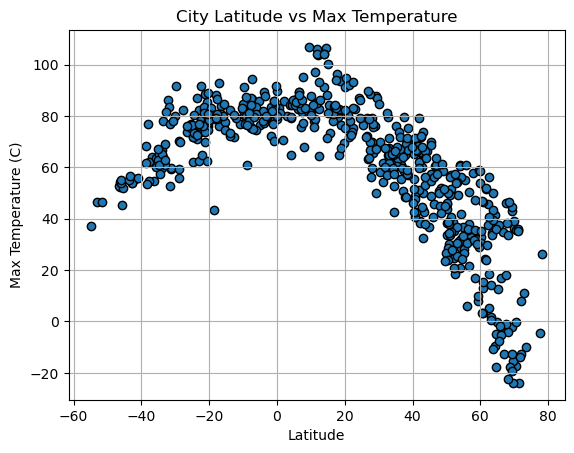

<Figure size 640x480 with 0 Axes>

In [147]:
# Build scatter plot for latitude vs. temperature
x_values =city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, edgecolors='black')
plt.title("City Latitude vs Max Temperature")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)
plt.show()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

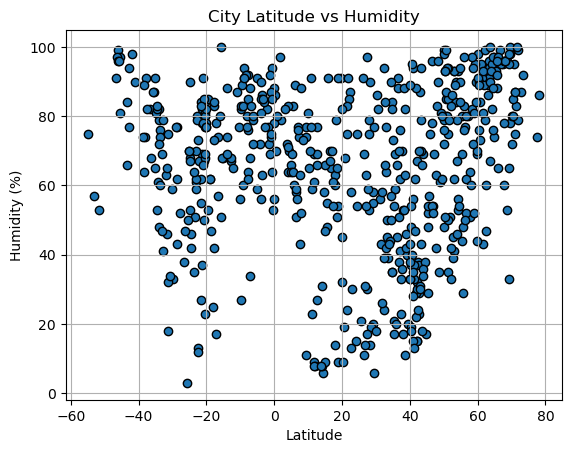

In [148]:
# Build the scatter plots for latitude vs. humidity
x_values =city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values, edgecolors='black')
plt.title("City Latitude vs Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

In [149]:
cloudiness=city_data_df['Cloudiness'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
cloudiness

City_ID
0       11
1        7
2       25
3      100
4      100
      ... 
586     83
587     40
588    100
589     61
590      0
Length: 591, dtype: int64

#### Latitude Vs. Cloudiness

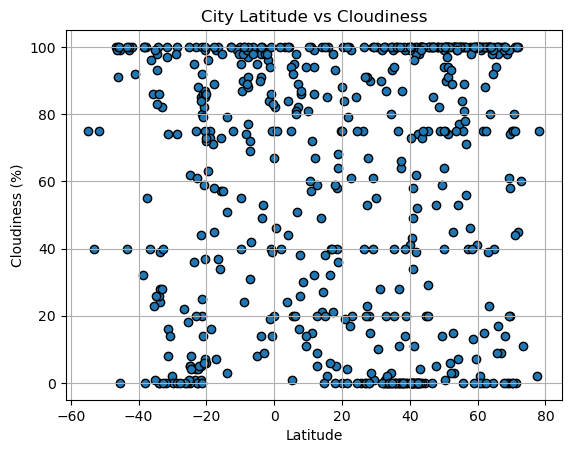

In [150]:
# Build the scatter plots for latitude vs. cloudiness
x_values =city_data_df['Lat']
y_values =city_data_df['Cloudiness'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
plt.scatter(x_values,y_values, edgecolors='black')
plt.title("City Latitude vs Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)


# Save the figure


# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

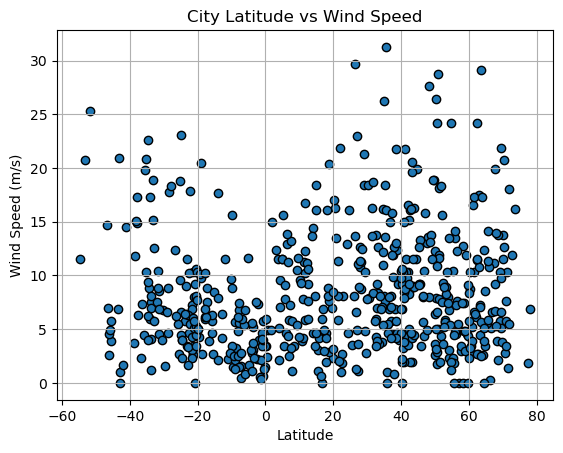

In [151]:
# Build the scatter plots for latitude vs. wind speed
x_values =city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values, edgecolors='black')
plt.title("City Latitude vs Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [152]:
# Define a function to create Linear Regression plots

In [153]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df=city_data_df[city_data_df['Lat'] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dikson,73.5069,80.5464,-9.87,92,{'all': 11},16.20,RU,1681225672
1,okhotsk,59.3833,143.3000,7.95,90,{'all': 7},4.52,RU,1681225672
4,havre-saint-pierre,50.2334,-63.5986,33.76,99,{'all': 100},7.92,CA,1681225672
5,severo-kurilsk,50.6789,156.1250,30.02,80,{'all': 90},24.23,RU,1681225673
7,hampton,37.0299,-76.3452,64.18,41,{'all': 0},8.05,US,1681225673


In [154]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,avarua,-21.2078,-159.7750,77.05,69,{'all': 25},5.75,CK,1681225672
3,rikitea,-23.1203,-134.9692,76.42,70,{'all': 100},6.42,PF,1681225672
6,hermanus,-34.4187,19.2345,64.80,61,{'all': 100},8.86,ZA,1681225673
14,vaini,-21.2000,-175.2000,78.96,83,{'all': 20},10.36,TO,1681225674
18,cape town,-33.9258,18.4232,66.88,48,{'all': 0},17.27,ZA,1681225415


###  Temperature vs. Latitude Linear Regression Plot

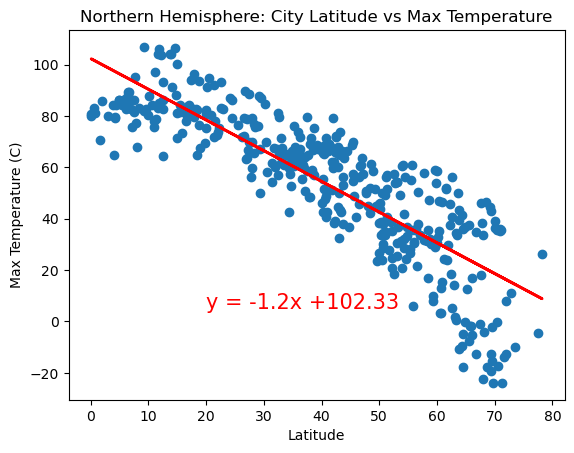

The r-value is: 0.709555544794625


In [155]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

#line equation
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#Create plot
plt.scatter(x_values,y_values)
plt.title("Northern Hemisphere: City Latitude vs Max Temperature")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

plt.plot(x_values,regress_values, 'red', linewidth=2)

#Print equation on plot
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Save the figure:
plt.savefig('output_data/Latitude vs. MaxTemp_North.png')

#Display
plt.show()

print(f"The r-value is: {rvalue**2}")

As northern latitude increases, max temperature decreases.

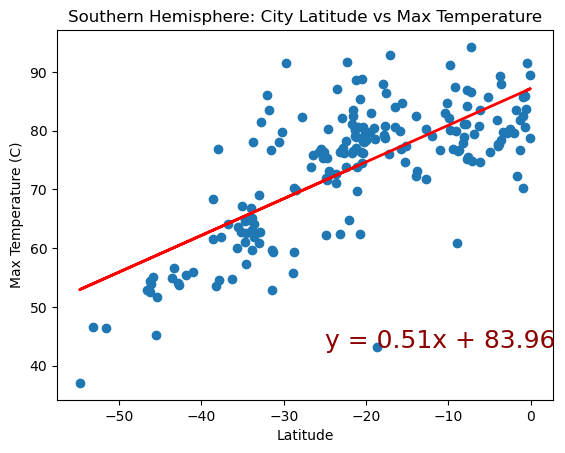

The r-value is: 0.5271899579526815


In [156]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

#line equation
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#Create plot
plt.scatter(x_values,y_values)
plt.title("Southern Hemisphere: City Latitude vs Max Temperature")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

plt.plot(x_values,regress_values, 'red', linewidth=2)

#Print equation on plot
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq2,(-25,43),fontsize=18, color='darkred')

# Save the figure:
plt.savefig('output_data/Latitude vs. MaxTemp_South.png')

#Display
plt.show()

print(f"The r-value is: {rvalue**2}")

As southern latitude increaes, max temperature increases.

### Humidity vs. Latitude Linear Regression Plot

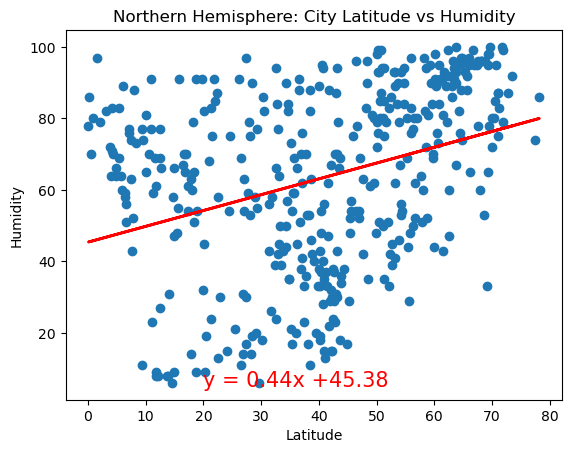

The r-value is: 0.11275777539099567


In [157]:
#Northern: Humidity vs. Latitude Linear Regression Plot
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

#line equation
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#Create plot
plt.scatter(x_values,y_values)
plt.title("Northern Hemisphere: City Latitude vs Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.plot(x_values,regress_values, 'red', linewidth=2)

#Print equation on plot
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Save the figure:
plt.savefig('output_data/Latitude vs. Humidity_North.png')

#Display
plt.show()

print(f"The r-value is: {rvalue**2}")

There is a small correlation between latitude and humidity-- as northern hempishere latitude increase, humidity increases. 

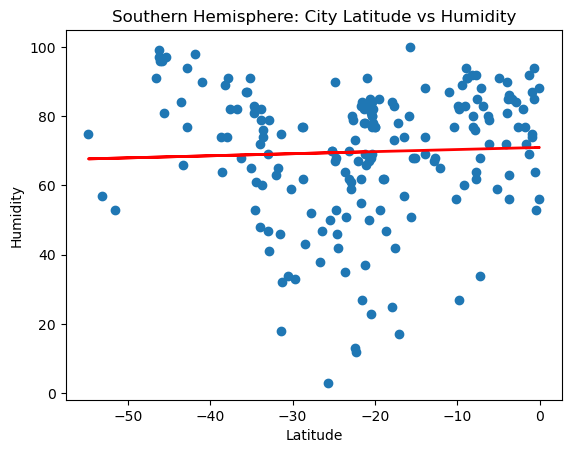

The r-value is: 0.0016683253303891043


In [159]:
# Southern Hemisphere: Humidity vs. Latitude Linear Regression Plot

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

#line equation
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#Create plot
plt.scatter(x_values,y_values)
plt.title("Southern Hemisphere: City Latitude vs Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.plot(x_values,regress_values, 'red', linewidth=2)

#Print equation on plot
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Save the figure:
plt.savefig('output_data/Latitude vs. Humidity_South.png')

#Display
plt.show()

print(f"The r-value is: {rvalue**2}")

There is a small correlation between latitude and humidity-- as southern hempishere latitude increase, humidity increases. 

### Cloudiness vs. Latitude Linear Regression Plot

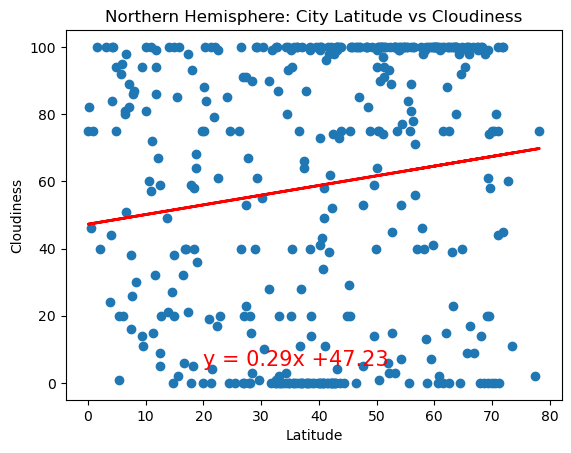

The r-value is: 0.019377750050032984


In [160]:
#Northern: Humidity vs. Cloudiness Linear Regression Plot
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

#line equation
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#Create plot
plt.scatter(x_values,y_values)
plt.title("Northern Hemisphere: City Latitude vs Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.plot(x_values,regress_values, 'red', linewidth=2)

#Print equation on plot
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Save the figure:
#plt.savefig('output_data/Latitude vs. MaxTemp_North.png')

#Display
plt.show()

print(f"The r-value is: {rvalue**2}")

There does not appear to be a correlation between latitude and cloudiness with respect to northern hemispehere latitude.

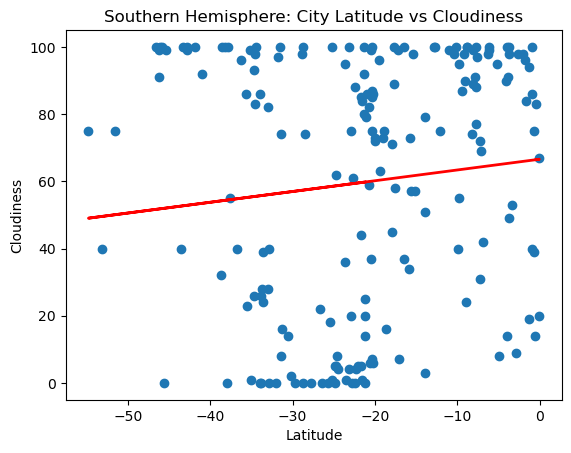

The r-value is: 0.012183889941182875


In [161]:
# Southern: Humidity vs. Cloudiness Linear Regression Plot
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

#line equation
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#Create plot
plt.scatter(x_values,y_values)
plt.title("Southern Hemisphere: City Latitude vs Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.plot(x_values,regress_values, 'red', linewidth=2)

#Print equation on plot
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Save the figure:
plt.savefig('output_data/Latitude vs. MaxTemp_North.png')

#Display
plt.show()

print(f"The r-value is: {rvalue**2}")

There is a small correlation between southern latitude and cloudiness-- as southern hempishere latitude increase, cloudiness increases. 

### Wind Speed vs. Latitude Linear Regression Plot

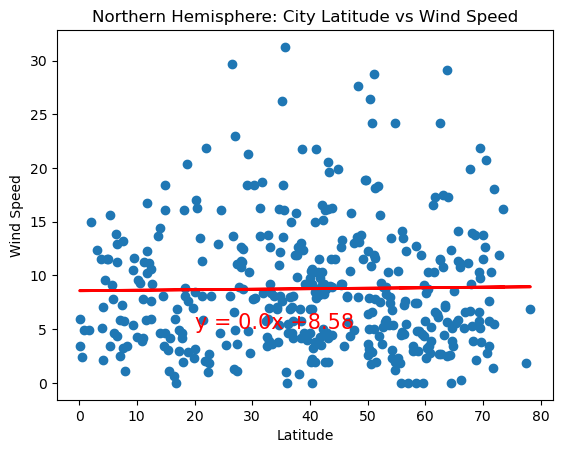

The r-value is: 0.00024535359237165327


In [162]:
#Northern: Wind Speed vs. Latitude Linear Regression Plot
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

#line equation
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#Create plot
plt.scatter(x_values,y_values)
plt.title("Northern Hemisphere: City Latitude vs Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.plot(x_values,regress_values, 'red', linewidth=2)

#Print equation on plot
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Save the figure:
#plt.savefig('output_data/Latitude vs. MaxTemp_North.png')

#Display
plt.show()

print(f"The r-value is: {rvalue**2}")

There does not appear to be a correlation between northern hemisphere latitude and wind speed.

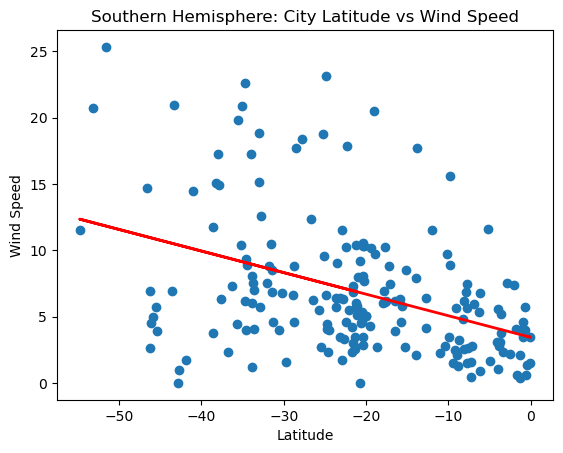

The r-value is: 0.16749078397980255


In [163]:
# Southern Hemisphere: Wind Speed vs. Latitude Linear Regression Plot
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

#line equation
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#Create plot
plt.scatter(x_values,y_values)
plt.title("Southern Hemisphere: City Latitude vs Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.plot(x_values,regress_values, 'red', linewidth=2)

#Print equation on plot
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Save the figure:
#plt.savefig('output_data/Latitude vs. MaxTemp_North.png')

#Display
plt.show()

print(f"The r-value is: {rvalue**2}")

There is a small correlation between latitude and wind speed in regards to southern hemisphere. As latitude increases, wind speed decreases.